# CSAL4243: Introduction to Machine Learning
Muhammad Mudassir Khan (mudasssir.khan@ucp.edu.pk)

# Lecture 1: Linear Regression

### Overview

- [What is Machine Learning?](#what-is-ml)
    - [Learning algorithms](#Learning-algorithms)
    - [Definition](#Definition)
- [The three different types of machine learning](#The-three-different-types-of-machine-learning)
    - [Learning from labled data with supervised learning](#Learning-from-labled-data-with-supervised-learning)
        - [Regression for predicting continuous outcomes](#Regression-for-predicting-continuous-outcomes)
        - [Classification for predicting class labels](#Classification-for-predicting-class-labels)
    - [Discovering hidden structures with unsupervised learning](#Discovering-hidden-structures-with-unsupervised-learning)
        - [Finding subgroups with clustering](#Finding-subgroups-with-clustering)
    - [Solving interactive problems with reinforcement learning](#Solving-interactive-problems-with-reinforcement-learning)
- [An introduction to the basic terminology and notations](#An-introduction-to-the-basic-terminology-and-notations)
- [A roadmap for building machine learning systems](#A-roadmap-for-building-machine-learning-systems)
- [Summary](#Summary)
- [Credits](#credits)

<br>
<br>

# What is Machine Learning? <a name="what-is-ml"></a> 

* Machine Learning is making computers/machcines learn from data
* Learning improve over time with more data

## Definition
Mitchell ( 1997 ) define Machine Learning as “A computer
program is said to learn from experience E with respect to some class of tasks T
and performance measure P , if its performance at tasks in T , as measured by P ,
improves with experience E .”

Example: playing checkers.

T = the task of playing checkers.

E = the experience of playing many games of checkers

P = the probability that the program will win the next game.

<br>
<br>

# The three different types of machine learning

<img style="float: left;" src="images/01_01.png", width=500>

<br>
<br>

## Supervised Learning

<img style="float: left;" src="images/01_02.png", width=500>

<br>
<br>

### Regression for predicting continuous outcomes


<img style="float: left;" src="images/01_04.png", width=300> <img style="float: right;" src="images/01_11.png", width=500>

### Classification for predicting class labels

<img style="float: left;" src="images/01_03.png", width=300> <img style="float: right;" src="images/01_12.png", width=500>

<br>
<br>

## Unsupervised Learning

<img style="float: left;" src="images/01_06.png", width=300>

<br>
<br>

## Reinforcement Learning

<img style="float: left;" src="images/01_05.png", width=300>

<br>
<br>

# Machine Learning pipeline

<img style="float: left;" src="images/model.png", width=500>

- x is called input variables or input features.

- y is called output or target variable. Also sometimes known as label.

- h is called hypothesis or model. 

- pair (x<sup>(i)</sup>,y<sup>(i)</sup>) is called a sample or training example

- dataset of all training examples is called training set.

- m is the number of samples in a dataset.

- n is the number of features in a dataset excluding label.

<img style="float: left;" src="images/02_02.png", width=400> 
<img style="float: right;" src="images/02_03.png", width=400>

#### Question ?
- What is x<sup>(2)</sup> and y<sup>(2)</sup>?

<br>
<br>

# Goal of Machine Learning algorithm

- How well the algorithm will perform on unseen data. 
- Also called generalization.

# Model Representation

- Model is represented by h<sub>$\theta$</sub>(x) or simply h(x)

- For Linear regression with one input variable h(x) =  $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x

<img style="float: left;" src="images/02_01.png">

- $\theta$<sub>0</sub> and $\theta$<sub>1</sub> are called weights or parameters.
- Need to find $\theta$<sub>0</sub> and $\theta$<sub>1</sub> that maximizes the performance of model.

<br>
<br>

# Cost Function

<img style="float: left;" src="images/02_04.png", width=500>

Let $\hat{y}$ = h(x) =  $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x

Error in single sample (x,y) = $\hat{y}$ - y = h(x) - y 

Cummulative error of all m samples = $\sum_{i=1}^{m} (h(x^i) - y^i)$

Finally mean error or cost function = J($\theta$) = $\frac{1}{2m}\sum_{i=1}^{m} (h(x^i) - y^i)$

# Would you have survived Titanic? 

In [4]:
from __future__ import print_function

import numpy as np
import tflearn

# Download the Titanic dataset
from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv')

# Load CSV file, indicate that the first column represents labels
from tflearn.data_utils import load_csv
data, labels = load_csv('titanic_dataset.csv', target_column=0,
                        categorical_labels=True, n_classes=2)


# Preprocessing function
def preprocess(data, columns_to_ignore):
    # Sort by descending id and delete columns
    for id in sorted(columns_to_ignore, reverse=True):
        [r.pop(id) for r in data]
    for i in range(len(data)):
      # Converting 'sex' field to float (id is 1 after removing labels column)
      data[i][1] = 1. if data[i][1] == 'female' else 0.
    return np.array(data, dtype=np.float32)

# Ignore 'name' and 'ticket' columns (id 1 & 6 of data array)
to_ignore=[1, 6]

# Preprocess data
data = preprocess(data, to_ignore)

print (data)

[[   1.            1.           29.            0.            0.
   211.3374939 ]
 [   1.            0.            0.91670001    1.            2.
   151.55000305]
 [   1.            1.            2.            1.            2.
   151.55000305]
 ..., 
 [   3.            0.           26.5           0.            0.
     7.2249999 ]
 [   3.            0.           27.            0.            0.
     7.2249999 ]
 [   3.            0.           29.            0.            0.            7.875     ]]


In [2]:
# Build neural network
net = tflearn.input_data(shape=[None, 6])
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

# Define model
model = tflearn.DNN(net)
# Start training (apply gradient descent algorithm)
model.fit(data, labels, n_epoch=10, batch_size=16, show_metric=True)

Training Step: 819  | total loss: 0.50917 | time: 0.347s
| Adam | epoch: 010 | loss: 0.50917 - acc: 0.7704 -- iter: 1296/1309
Training Step: 820  | total loss: 0.49590 | time: 0.349s
| Adam | epoch: 010 | loss: 0.49590 - acc: 0.7746 -- iter: 1309/1309
--


In [3]:
# Let's create some data for DiCaprio and Winslet
dicaprio = [3, 'Jack Dawson', 'male', 19, 0, 0, 'N/A', 5.0000]
winslet = [1, 'Rose DeWitt Bukater', 'female', 17, 1, 2, 'N/A', 100.0000]
user = [2, 'user', 'female', 20, 0, 2, 'N/A', 50.0000]
# Preprocess data
dicaprio, winslet, user = preprocess([dicaprio, winslet, user], to_ignore)
# Predict surviving chances (class 1 results)
pred = model.predict([dicaprio, winslet, user])
print("DiCaprio Surviving Rate:", pred[0][1])
print("Winslet Surviving Rate:", pred[1][1])
print("user Surviving Rate:", pred[2][1])

DiCaprio Surviving Rate: 0.09548981487751007
Winslet Surviving Rate: 0.8807896375656128
user Surviving Rate: 0.7699385285377502


# Applications

* ## Algrithm that plays Atari breakout

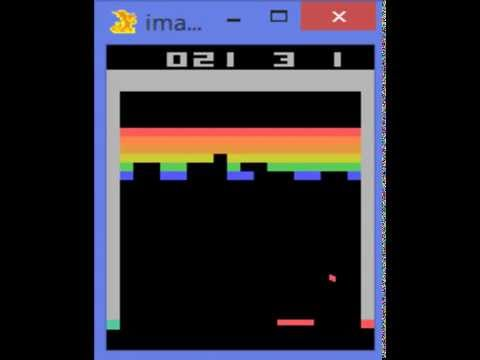

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo("V1eYniJ0Rnk")

* ## Machine Learning algorithm is better than human at object recognition

<br>
<br>

# Summary
Machine learning is at the heart of all technologies today.

# Resouces

Course website: [https://w4zir.github.io/ml17s/](https://w4zir.github.io/ml17s/)

[Course resources](https://github.com/w4zir/ml17s)

# Credits
Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015. Print.